# ***IMPORT LIBRARY***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

# ***PREPROCESSING***

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/fruit/train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/fruit/test',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 608 images belonging to 10 classes.
Found 267 images belonging to 10 classes.


In [ ]:
train_set.class_indices

{'chanh': 0,
 'chuối': 1,
 'dâu tây': 2,
 'dưa hấu': 3,
 'dừa': 4,
 'dứa': 5,
 'măng cụt': 6,
 'ổi': 7,
 'táo': 8,
 'xoài': 9}

# ***CREATE MODEL***

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# ***TRAINING MODEL***

In [ ]:
history = model.fit(train_set,batch_size=128,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
51/51 [==============================] - 235s 5s/step - loss: 1.8370 - accuracy: 0.3914 - val_loss: 1.5850 - val_accuracy: 0.4045
Epoch 2/20
51/51 [==============================] - 19s 373ms/step - loss: 1.3548 - accuracy: 0.5658 - val_loss: 1.2690 - val_accuracy: 0.5693
Epoch 3/20
51/51 [==============================] - 19s 373ms/step - loss: 1.0630 - accuracy: 0.6612 - val_loss: 1.4049 - val_accuracy: 0.5131
Epoch 4/20
51/51 [==============================] - 19s 373ms/step - loss: 1.0501 - accuracy: 0.6546 - val_loss: 1.0958 - val_accuracy: 0.6217
Epoch 5/20
51/51 [==============================] - 19s 376ms/step - loss: 0.8422 - accuracy: 0.7188 - val_loss: 1.0355 - val_accuracy: 0.6554
Epoch 6/20
51/51 [==============================] - 19s 370ms/step - loss: 0.8158 - accuracy: 0.7122 - val_loss: 0.9828 - val_accuracy: 0.6704
Epoch 7/20
51/51 [==============================] - 19s 373ms/step - loss: 0.6591 - accuracy: 0.7845 - val_loss: 0.8509 - val_accuracy: 0.7303
E

# ***EVALUATE***

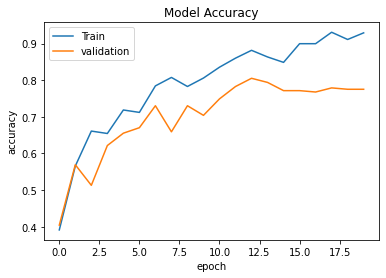

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Loss: ',score[0])
print('Accuracy: ',score[1])

23/23 [==============================] - 3s 112ms/step - loss: 0.9927 - accuracy: 0.7753
Loss:  0.9926869869232178
Accuracy:  0.7752808928489685


In [ ]:
model.save('Fruit.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('Fruit.h5')

# ***TESTING***

In [ ]:
def predict(result):
  if round(result[0][0])==1:
    print("chanh")
  elif round(result[0][1])==1:
    print("chuối")
  elif round(result[0][2])==1:
    print("dâu tây")
  elif round(result[0][3])==1:
    print("dưa hấu")  
  elif round(result[0][4])==1:
    print("dừa") 
  elif round(result[0][5])==1:
    print("dứa")
  elif round(result[0][6])==1:
    print("măng cụt")
  elif round(result[0][7])==1:
    print("Ổi")  
  elif round(result[0][8])==1:
    print("táo") 
  elif round(result[0][9])==1:
    print("xoài")


chuối


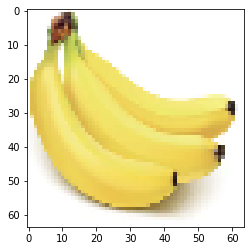

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/chuối/Screen Shot 2018-06-12 at 9.43.27 PM.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

chanh


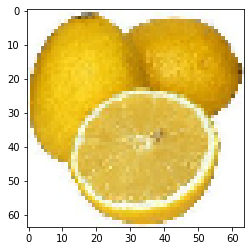

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/chanh/1.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dâu tây


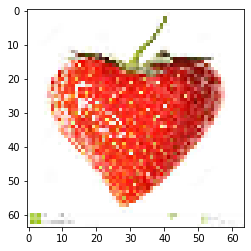

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/dâu tây/images - 2021-06-21T111522.305.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dưa hấu


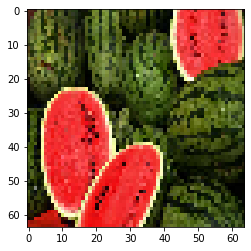

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/dưa hấu/2.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dừa


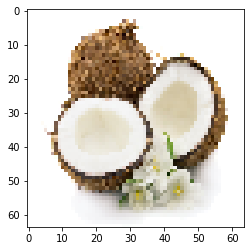

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/dừa/7.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dứa


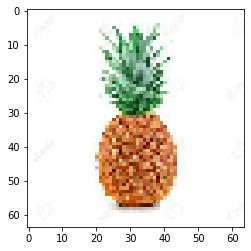

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/dứa/20.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

măng cụt


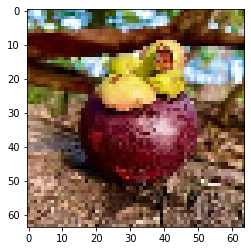

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/măng cụt/52.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

Ổi


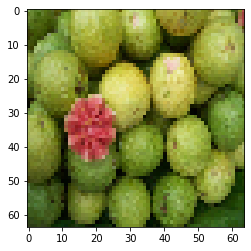

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/ổi/0.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dâu tây


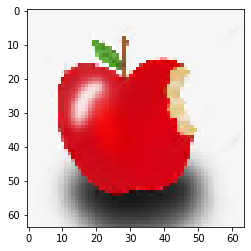

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/táo/image (11).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

xoài


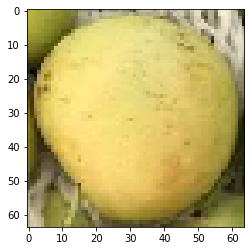

In [ ]:
test_img=load_img('/content/drive/MyDrive/fruit/validate/xoài/1.jpg',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)